In [1]:
from sqlalchemy import create_engine
import pandas as pd

C:\Users\JOSH\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\JOSH\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\JOSH\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
username= 'root'
password = 'olajideda12$'
host = 'DESKTOP-1KOB44N'
database= 'jide_2023'
engine = create_engine(f'mysql+pymysql://{username}:{password}@{host}/{database}')

In [3]:
query = 'SELECT * FROM cardata'
df = pd.read_sql(query, engine)

In [4]:
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Exploratory Data analysis using datasist library

In [5]:
# !pip install datasist

In [6]:
import datasist as ds

In [7]:
ds.structdata.describe(df)

First five data points


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0




Random five data points


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
263,jazz,2016,6.60,7.70,16002,Petrol,Dealer,Manual,0
61,etios cross,2015,4.50,7.70,40588,Petrol,Dealer,Manual,0
178,TVS Jupyter,2014,0.35,0.52,19000,Petrol,Individual,Automatic,0
110,KTM RC200,2016,1.20,1.78,6000,Petrol,Individual,Manual,0
148,Bajaj Pulsar 220 F,2010,0.52,0.94,45000,Petrol,Individual,Manual,0




Last five data points


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0




Shape of  data set: (301, 9)


Size of  data set: 2709


Data Types
Note: All Non-numerical features are identified as objects in pandas


,Data Type
Car_Name,object
Year,int64
Selling_Price,float64
Present_Price,float64
Kms_Driven,int64
Fuel_Type,object
Seller_Type,object
Transmission,object
Owner,int64




Numerical Features in Data set
['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']


Categorical Features in Data set


['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']



Statistical Description of Columns


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000




Description of Categorical Features


,count,unique,top,freq
Car_Name,301,98,city,26
Fuel_Type,301,3,Petrol,239
Seller_Type,301,2,Dealer,195
Transmission,301,2,Manual,261




Unique class Count of Categorical features


,Feature,Unique Count
0,Car_Name,98
1,Fuel_Type,3
2,Seller_Type,2
3,Transmission,2




Missing Values in Data


,features,missing_counts,missing_percent
0,Car_Name,0,0.0
1,Year,0,0.0
2,Selling_Price,0,0.0
3,Present_Price,0,0.0
4,Kms_Driven,0,0.0
5,Fuel_Type,0,0.0
6,Seller_Type,0,0.0
7,Transmission,0,0.0
8,Owner,0,0.0


Unique Values in Car_Name is too large to plot




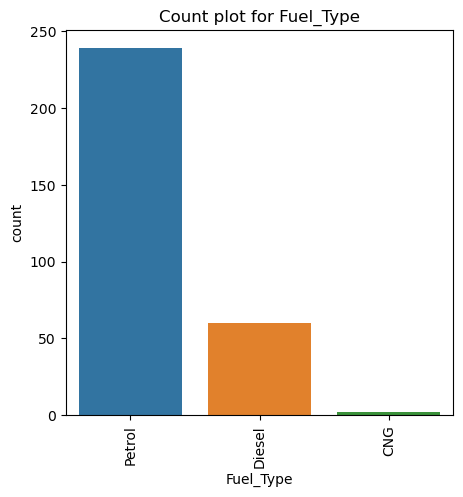

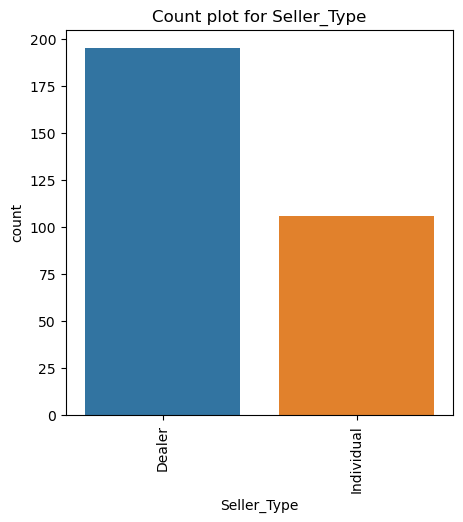

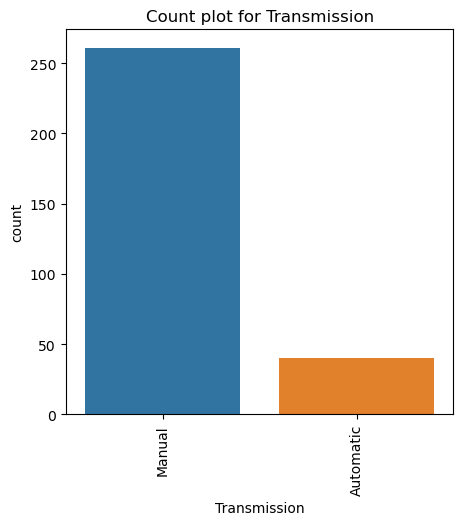

In [8]:
ds.visualizations.countplot(df)

Unique Values in Car_Name is too large to plot




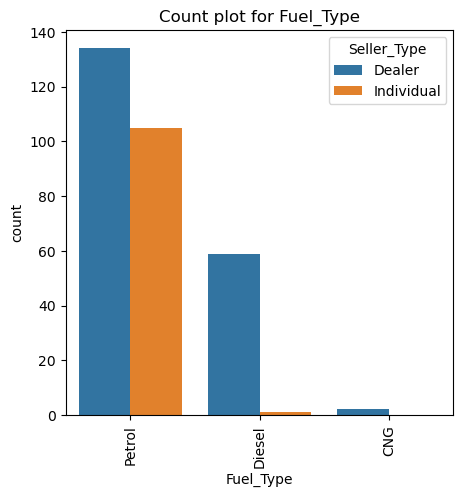

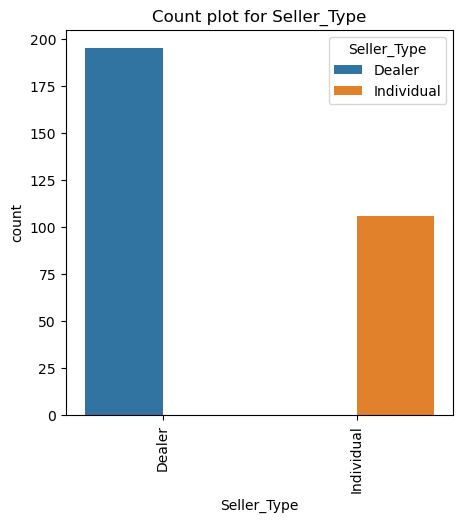

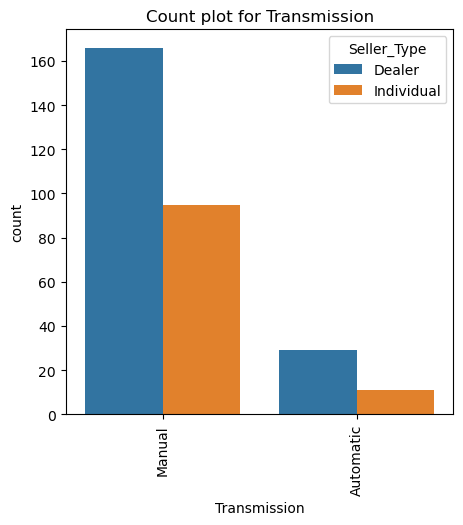

In [9]:
ds.visualizations.countplot(df, separate_by ='Seller_Type')

In [10]:
# ds.visualizations.countplot(df, separate_by='fuel_type')

### Feature Engineering

In [11]:
df = ds.feature_engineering.fill_missing_cats(df)
df = ds.feature_engineering.fill_missing_num(df)

In [12]:
df['Year'] = 2023 - df['Year']

In [13]:
df.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [14]:
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

In [15]:
# fuel = {'Petrol':0, 'Diesel':1, 'CNG':2}

# df.Fuel_Type = df['Fuel_Type'].map(fuel)

In [16]:
# df = df[['Year', 'Selling_Price','Present_Price','Kms_Driven','Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [17]:
# df.Owner.value_counts()

In [18]:
# seller = {'Dealer':0, 'Individual':1}
# df.Seller_Type = df.Seller_Type.map(seller)
df = pd.get_dummies(df, columns=['Fuel_Type','Seller_Type','Transmission'], drop_first =True)

In [19]:
# Trans = {'Manual':0, 'Automatic':1}
# df.Transmission = df.Transmission.map(Trans)

In [20]:
# owner = {0:0, 1:1, 3:2}
# df.Owner = df.Owner.map(owner)

df

In [21]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Owner', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')

In [22]:
df


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,ritz,9,3.35,5.59,27000,0,0,1,0,1
1,sx4,10,4.75,9.54,43000,0,1,0,0,1
2,ciaz,6,7.25,9.85,6900,0,0,1,0,1
3,wagon r,12,2.85,4.15,5200,0,0,1,0,1
4,swift,9,4.60,6.87,42450,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
296,city,7,9.50,11.60,33988,0,1,0,0,1
297,brio,8,4.00,5.90,60000,0,0,1,0,1
298,city,14,3.35,11.00,87934,0,0,1,0,1
299,city,6,11.50,12.50,9000,0,1,0,0,1


In [23]:
import seaborn as sns
import matplotlib.pyplot  as plt 
plt.rcParams['figure.figsize']=[8, 6]

<AxesSubplot:>

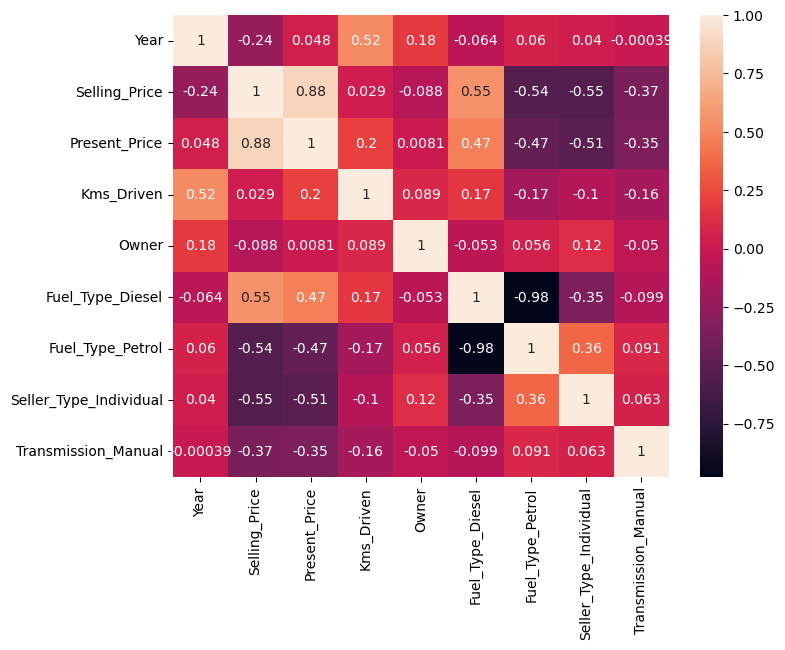

In [24]:
sns.heatmap(df.corr(), annot=True)

### Modelling 

In [25]:
# df_2=df[['Year', 'Selling_Price','Present_Price','Kms_Driven', 'Owner','Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual']]

In [26]:
df=df[['Year', 'Selling_Price', 'Present_Price','Kms_Driven',
       'Owner', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Individual', 'Transmission_Manual']]
# df.columns

In [27]:
X= df.drop('Selling_Price',axis=1)
y= df.Selling_Price
X.shape
# y.shape

(301, 8)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 42)

In [30]:
print(X_train.shape,
      X_test.shape)

(210, 8) (91, 8)


In [31]:
r_model = RandomForestRegressor()
r_model.fit(X_train, y_train)

RandomForestRegressor()

In [32]:
prediction = r_model.predict(X_test)
prediction.shape

(91,)

In [33]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

RMSE : 1.0590088453905306


In [34]:
import pickle
file = open('random_forest_model.pkl','wb')
pickle.dump(r_model,file)
file.close()

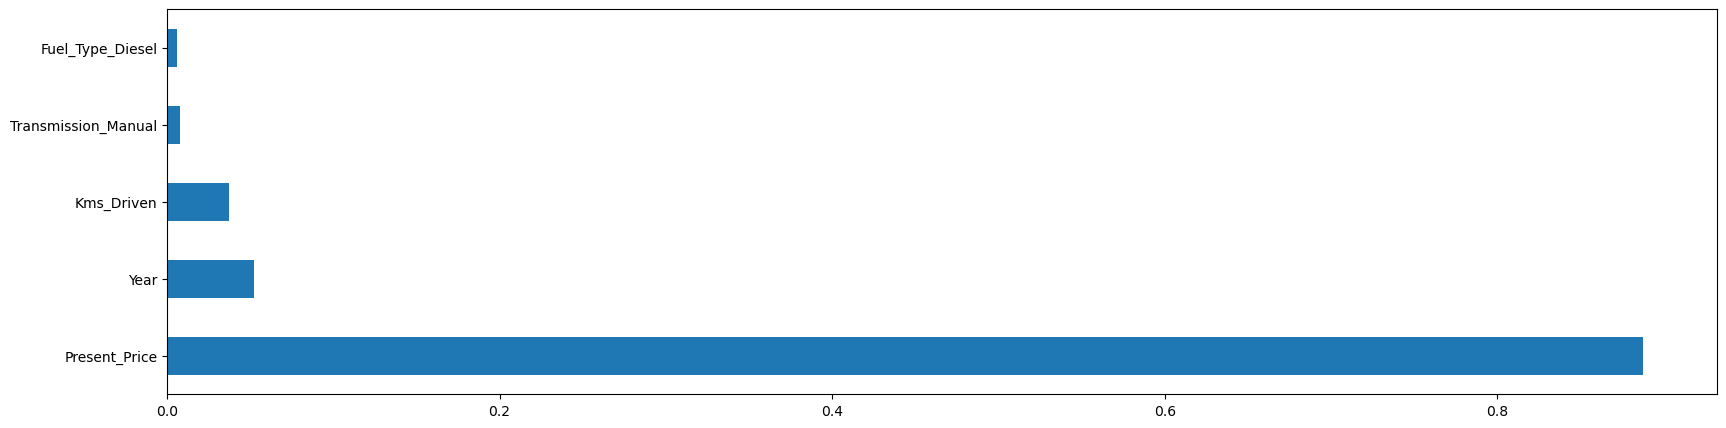

In [35]:
# #### plotting the feature importance of the model

feat_importance= pd.Series(r_model.feature_importances_, index=X_train.columns)
feat_importance.nlargest(5).plot(kind='barh', figsize=(20,5))
plt.show()

In [36]:
feat_importance.nlargest(5)

Present_Price          0.887701
Year                   0.052532
Kms_Driven             0.037217
Transmission_Manual    0.007901
Fuel_Type_Diesel       0.005886
dtype: float64